<a href="https://colab.research.google.com/github/uandersonricardo/lower-back-pain-symptoms/blob/main/SI_Miniprojeto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multilayer Perceptron (MLP) para Detecção de Lombalgia**
#### Centro de Informática - UFPE
#### Miniprojeto 1 - Sistemas Inteligentes

#### Prof. Germano Crispim Vasconcelos

#### Equipe
- Alexandre Burle (aqb)
- Danilo Vaz (dvma)
- Matheus Andrade (mvtna)
- Uanderson Ricardo (urfs)

# Proposta
A proposta do projeto é utilizar redes MLP em cima de um conjunto de dados de **sintomas de lombalgia** com o objetivo de identificar pessoas que podem ter a doença a partir dessas determinadas caracteristicas. O dataset utilizado pode ser acessado através desse [link](https://raw.githubusercontent.com/uandersonricardo/lower-back-pain-symptoms/main/Dataset_spine.csv).

# Bibliotecas
Para o desenvolvimento do projeto, foram utilizadas as seguintes bibliotecas. 
- Pandas: para manipulação dos dados estruturados durante o pré-processamento;
- Tensorflow Keras: criar a rede MLP para solução do problema, utilizando as estruturas Sequential, Dense e Adam;
- Numpy: para manipulação dos dados estruturados em forma de matrizes e arrays multidimensionais;
- Matplotlib: para visualização dos gráficos referentes ao aprendizado da rede.

In [2]:
import tensorflow
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Passo 1 - Dataset
Em primeiro lugar, foi feita a importação do dataset (comentado e referenciado na primeira seção deste notebook/documento). Assim, com o dataset importado, pode-se analisar como os dados estão estruturados. Percebe-se que existem 13 colunas de características e uma coluna com a classe (Abnormal ou Normal). Além disso, percebe-se que o dataset está ordenado de acordo com as classes.

In [3]:
url = 'https://raw.githubusercontent.com/uandersonricardo/lower-back-pain-symptoms/main/Dataset_spine.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


# Passo 2 - Pré-Processamento
Entretanto, como visto nas células anteriores, a estrutura dos dados contém uma classe chamada 'Unnamed: 13' que não fornece nenhuma informação relevante para a detecção da lombalgia. Assim, pode-se removê-la dos dados de modo que facilite a manipulação dos mesmos no processo.

In [5]:
df = df.drop(['Unnamed: 13'], axis=1)
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


# Passo 3 - Datasets de Treino e Teste
Com os dados pré-processados, deve-se separar as amostras em dois grupos diferentes: o dataset de treino e o dataset de teste. Para isso, faz-se o 'shuffle' do dataset pré-processado para embaralhar as amostras, uma vez que, como comentado anteriormente, as amostras estavam ordenadas de acordo com as classes. Logo, é interessante fazer o embaralhamento dos dados de modo que não haja uma sequência de dados no treino. Posteriormente, com o dataset embaralhado, define-se um ponto de quebra nos dados, para separar os datasets. O valor definido aqui foi de 80% dos dados para treino e 20% dos dados para teste.

In [6]:
df_shuffled = df.sample(frac=1)

partition = int(len(df) * 0.8)

df_train = df_shuffled.iloc[:partition]
df_test = df_shuffled.iloc[partition:]

# Passo 4 - Representação da Classe
Com os datasets separados, deve-se separar cada um deles entre características e classes (ou X e Y). Para tanto, define-se que as classes (Y_train e Y_test)serão 1 para os dados que apresentarem lombalgia e serão 0 caso contrário. 
Para as características de entrada, basta remover a coluna correspondente a classe e, então, tem-se os dados de entrada definidos tanto para treino quanto para teste (X_train e X_test, respectivamente). 

In [7]:
Y_train = 1 - pd.factorize(df_train['Class_att'])[0]
X_train = df_train.drop(['Class_att'], axis=1)

Y_test = 1 - pd.factorize(df_test['Class_att'])[0]
X_test = df_test.drop(['Class_att'], axis=1)

# Passo 5 - Estrutura da Rede
Com os dados estruturados para serem inseridos na rede, é preciso agora definir a estrutura da rede que será treinada para a identificação da lombalgia a partir dos dados recebidos. Para tanto, foi estruturada uma rede neural sequencial, contendo duas camadas ocultas. 
A função de ativação para ambas as camadas ocultas são 'relu' e a função de ativação da camada de saída é a sigmoide.

In [40]:
input_shape = (12,)

model = Sequential()
model.add(Dense(128, input_shape=input_shape, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Passo 6 - Modelo
Com a estrutura da rede definida, o modelo precisa de mais alguns parâmetros para, enfim, poder ser treinado e avaliado. Para a aplicação desejada, foi utilizado o otimizador Adam, com uma taxa de aprendizado de 0.0001, e a função de loss Binary Crossentropy. 
É interessante notar que 20% do dataset de treino foi separado para a validação do modelo, que verifica se o treino está caminhando para um bom resultado.
Com a execução da célula a seguir, pode-se ter uma noção da acurácia da rede através dos valores que o método fit retorna.


In [41]:
optimizer = Adam(learning_rate=1e-4)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
result = model.fit(X_train, Y_train, epochs=100, verbose=0, validation_split=0.2)

# Passo 7 - Análise
Entretanto, visualizar o sucesso ou fracasso da rede vai além da acurácia, sobretudo da acurácia no processo de treino. Por isso, deve-se analisar se a rede converge ou não. Logo, verificar os gráficos da função de Loss e da acurácia da rede é uma forma interessante de se analisar o modelo. Desse modo, na célula seguinte, são apresentados quatro gráficos referentes aos atributos 'loss', 'validation loss', 'accuracy' e 'validation accuracy'.

Text(0.5, 1.0, 'Validation Accuracy')

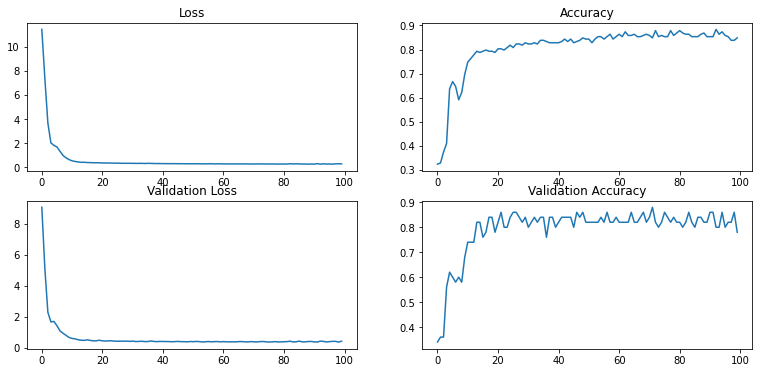

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(13, 6))
ax[0][0].plot(result.history['loss'])
ax[0][0].set_title('Loss')
ax[0][1].plot(result.history['accuracy'])
ax[0][1].set_title('Accuracy')
ax[1][0].plot(result.history['val_loss'])
ax[1][0].set_title('Validation Loss')
ax[1][1].plot(result.history['val_accuracy'])
ax[1][1].set_title('Validation Accuracy')

# Passo 8 - Teste
Por fim, com o modelo estruturado e treinado, é hora de testá-lo. Para isso, basta utilizar o dataset de teste que foi separado no início deste notebook/documento e usá-lo a avaliação do modelo.
Executando a célula a seguir, são apresentados os valores da loss e da acurácia do modelo no dataset de teste.


In [43]:
eval = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test results - Loss: {eval[0]} - Accuracy: {eval[1]}')

Test results - Loss: 0.36663690209388733 - Accuracy: 0.8064516186714172


# Passo 9 - Experimentações
Testamos diferentes hiperparâmetros em busca de uma performance melhor da rede, tais como arquitetura da rede, função de loss, learning rate, etc.

Primeiro, montamos uma arquitetura profunda (deep_model). Ela é composta por 11 camadas ocultas com 128 neurônios. Como o conjunto de dados é pequeno, a rede não performa melhor que a arquitetura principal. Observa-se sinais de overfitting, já que enquanto a loss do treinamento abaixa, a loss da validação aumenta.

Em seguida, montamos a arquitetura com alto learning rate (high_lr_model). Escolhemos um learning rate de 0.1. Por ser um valor muito alto, a rede não consegue aprender. Com a atualização dos pesos de forma abrupta, os valores "passam direto" do caminho para a otimização da função de loss.

Por fim, montamos a arquitetura com função de loss MSE (mse_model). A MSE é uma ótima função de loss, conseguindo inclusive superar a perfomance da binary crossentropy. O problema da MSE usada em conjunto com a saída sigmoide é que ela não funciona como uma função convexa. De tal forma, ficamos sujeitos a ficarmos presos em minímos locais


In [44]:
# Rede neural profunda
deep_model = Sequential()
deep_model.add(Dense(128, input_shape=input_shape, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(128, activation='relu'))
deep_model.add(Dense(1, activation='sigmoid'))

deep_optimizer = Adam(learning_rate=1e-4)
deep_model.compile(loss='binary_crossentropy', optimizer=deep_optimizer, metrics=['accuracy'])
deep_result = deep_model.fit(X_train, Y_train, epochs=100, verbose=0, validation_split=0.2)

deep_eval = deep_model.evaluate(X_test, Y_test, verbose=0)
print(f'Test results - Loss: {deep_eval[0]} - Accuracy: {deep_eval[1]}')

Test results - Loss: 0.5702855587005615 - Accuracy: 0.8064516186714172


In [45]:
# Rede neural com alto learning rate
high_lr_model = Sequential()
high_lr_model.add(Dense(128, input_shape=input_shape, activation='relu'))
high_lr_model.add(Dense(64, activation='relu'))
high_lr_model.add(Dense(1, activation='sigmoid'))

high_lr_optimizer = Adam(learning_rate=1e-1)
high_lr_model.compile(loss='binary_crossentropy', optimizer=high_lr_optimizer, metrics=['accuracy'])
high_lr_result = high_lr_model.fit(X_train, Y_train, epochs=100, verbose=0, validation_split=0.2)

high_lr_eval = high_lr_model.evaluate(X_test, Y_test, verbose=0)
print(f'Test results - Loss: {high_lr_eval[0]} - Accuracy: {high_lr_eval[1]}')

Test results - Loss: 0.581626832485199 - Accuracy: 0.6935483813285828


In [46]:
# Rede neural com a função de loss MSE
mse_model = Sequential()
mse_model.add(Dense(128, input_shape=input_shape, activation='relu'))
mse_model.add(Dense(64, activation='relu'))
mse_model.add(Dense(1, activation='sigmoid'))

mse_optimizer = Adam(learning_rate=1e-4)
mse_model.compile(loss='mean_squared_error', optimizer=mse_optimizer, metrics=['accuracy'])
mse_result = mse_model.fit(X_train, Y_train, epochs=100, verbose=0, validation_split=0.2)

mse_eval = mse_model.evaluate(X_test, Y_test, verbose=0)
print(f'Test results - Loss: {mse_eval[0]} - Accuracy: {mse_eval[1]}')

Test results - Loss: 0.1152167022228241 - Accuracy: 0.8548387289047241


Text(0.5, 1.0, 'Validation Accuracy')

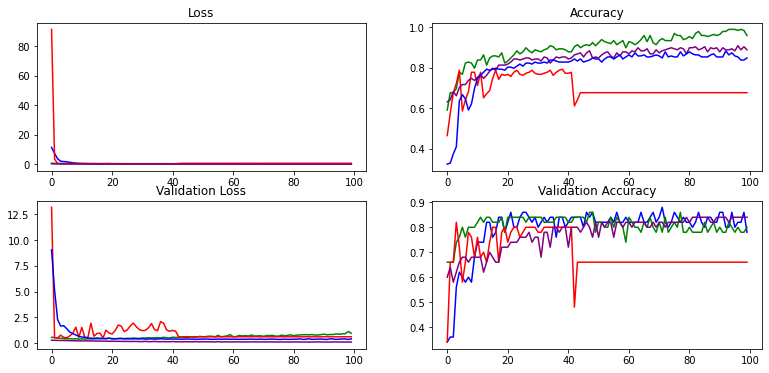

In [47]:
fig, ax = plt.subplots(2, 2, figsize=(13, 6))

ax[0][0].plot(result.history['loss'], color='blue', linestyle='solid')
ax[0][0].plot(deep_result.history['loss'], color='green', linestyle='solid')
ax[0][0].plot(high_lr_result.history['loss'], color='red', linestyle='solid')
ax[0][0].plot(mse_result.history['loss'], color='purple', linestyle='solid')
ax[0][0].set_title('Loss')

ax[0][1].plot(deep_result.history['accuracy'], color='green', linestyle='solid')
ax[0][1].plot(high_lr_result.history['accuracy'], color='red', linestyle='solid')
ax[0][1].plot(mse_result.history['accuracy'], color='purple', linestyle='solid')
ax[0][1].plot(result.history['accuracy'], color='blue', linestyle='solid')
ax[0][1].set_title('Accuracy')

ax[1][0].plot(deep_result.history['val_loss'], color='green', linestyle='solid')
ax[1][0].plot(high_lr_result.history['val_loss'], color='red', linestyle='solid')
ax[1][0].plot(mse_result.history['val_loss'], color='purple', linestyle='solid')
ax[1][0].plot(result.history['val_loss'], color='blue', linestyle='solid')
ax[1][0].set_title('Validation Loss')

ax[1][1].plot(result.history['val_accuracy'], color='blue', linestyle='solid')
ax[1][1].plot(deep_result.history['val_accuracy'], color='green', linestyle='solid')
ax[1][1].plot(high_lr_result.history['val_accuracy'], color='red', linestyle='solid')
ax[1][1].plot(mse_result.history['val_accuracy'], color='purple', linestyle='solid')
ax[1][1].set_title('Validation Accuracy')